# Introduction:

- This project focuses on predicting customer churn for a credit card company using an Artificial Neural Network (ANN). The dataset consists of customer demographics, financial attributes, and behavioral factors that influence whether a customer stays or leaves. The goal is to build a predictive model using deep learning techniques that accurately classify customers into churned (Exited = 1) or retained (Exited = 0).



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6333 - loss: 0.6293 - val_accuracy: 0.8056 - val_loss: 0.4837
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4758 - val_accuracy: 0.8188 - val_loss: 0.4368
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4247 - val_accuracy: 0.8206 - val_loss: 0.4185
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.3973 - val_accuracy: 0.8288 - val_loss: 0.4042
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.3989 - val_accuracy: 0.8344 - val_loss: 0.3907
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3925 - val_accuracy: 0.8381 - val_loss: 0.3830
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.3783 - val_accuracy: 0.8419 - val_loss: 0.3771
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.3734 - val_accu

In [22]:
model.layers[0].get_weights()

[array([[ 0.15526268, -0.1689488 , -0.05854435,  0.2438522 ,  0.00793107,
          0.10040119,  0.01346531,  0.0626073 , -0.12690419,  0.16732104,
          0.23982139],
        [-0.08074615, -0.5084707 , -0.0403484 , -0.51687974,  0.4412986 ,
          0.2381011 ,  0.43007708, -1.1878337 , -0.49743873,  1.0333942 ,
          0.04169643],
        [ 0.25741214,  0.07207984, -0.09869315, -0.48628205,  0.11512087,
         -0.19704798, -0.33155927, -0.24995103,  0.45646712, -0.11888426,
         -0.03158482],
        [-0.08818692, -0.06986658, -0.5557933 , -0.02605772, -0.22305728,
          0.2434153 ,  0.482199  ,  0.33132875,  0.00992067, -0.00843243,
          0.10733824],
        [ 1.2909727 ,  0.01877212, -0.84452933,  0.21009608, -0.19729397,
         -1.0846014 ,  0.9804049 , -0.11159665,  0.4431612 , -0.35887745,
         -0.44172627],
        [-0.06861155, -0.19941327, -0.04214552, -0.15496223,  0.1194855 ,
         -0.1299825 , -0.02920915, -0.00271737,  0.2825063 , -0.0400534

In [23]:
model.layers[1].get_weights()

[array([[ 5.69331348e-01, -1.40354723e-01, -5.41263402e-01,
          3.88151616e-01, -2.43810162e-01,  3.53053898e-01,
          4.80496764e-01, -4.37423229e-01,  1.00080915e-01,
          5.34074716e-02, -7.00349867e-01],
        [-6.63781213e-03,  9.71417576e-02,  2.52930164e-01,
          2.29964077e-01,  3.71462256e-01,  4.25673217e-01,
          2.36794233e-01, -4.64138761e-03, -6.14040494e-01,
          5.92048168e-01,  3.26564372e-01],
        [ 5.66746414e-01, -8.48439932e-02, -7.26586580e-01,
          2.11705521e-01, -5.01260519e-01,  5.74504018e-01,
         -3.93931568e-02, -6.70110583e-01, -5.61423838e-01,
         -5.53373337e-01,  2.63805449e-01],
        [ 2.68941790e-01, -1.05094361e+00,  3.33148152e-01,
          5.28493822e-02,  6.08235002e-01, -5.24917901e-01,
          1.71128154e-01, -2.05668062e-02,  5.81774056e-01,
         -4.41458039e-02,  3.32815014e-02],
        [-1.52494416e-01, -3.92534435e-01,  2.87117243e-01,
         -9.04047713e-02,  8.06527063e-02,  

In [24]:
model.layers[2].get_weights()

[array([[ 0.523162  ],
        [ 0.97524667],
        [ 0.5510499 ],
        [ 1.1527808 ],
        [-1.1030658 ],
        [ 0.780309  ],
        [-1.1460193 ],
        [-0.72104734],
        [-1.1443176 ],
        [-0.6088197 ],
        [ 0.23811261]], dtype=float32),
 array([-0.27251115], dtype=float32)]

In [25]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
import numpy as np
Y_pred=np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.859

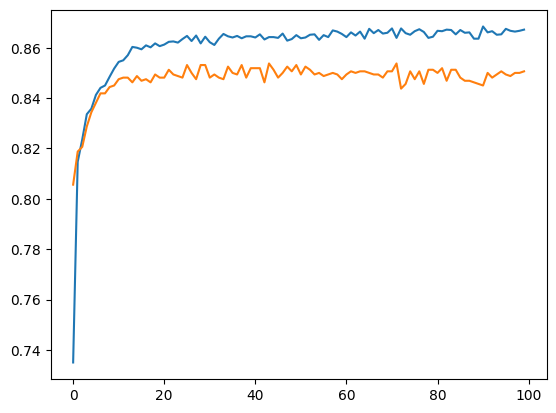

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


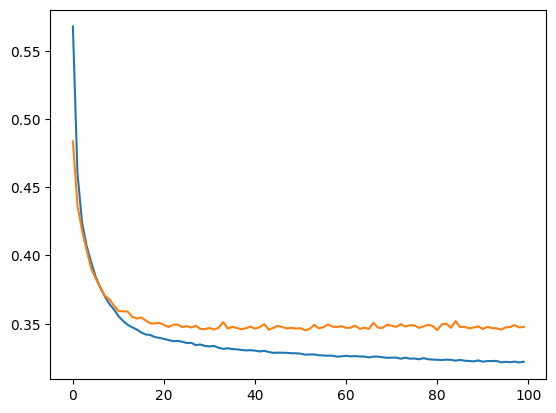

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])